# Transformación de Datos

Transformación de datos es una de los procesos que más tiempo lleva en un un flujo de Data Science y, lamentablemente, muchas veces no es entretenido. Pero es importante no perder el objetivo de por qué lo hacemos, si bien en este momento de la carrera puede parecer un poco abstracto. Por un lado, los modelos de Machine Learning que usemos, que van a "aprender" de nuestros datos, sólo entienden de números. Esto quiere decir que, si en un dataset como el de Titanic hay una columna de género con dos valores, *male* y *female*, tendremos que llevarlo a una representación que los modelos entiendan. En este caso, es sencillo, asignamos un "0" y un "1" a cada uno de los valores y problema resuelto. En el fondo, hay una hipótesis implícita: el género nos sirve para predecir supervivencia, por lo que queremos mantener esta información y hacerla comprensible para nuestros modelos. Eso es un atributo (feature): un pedazo de información potencialmente bueno para aprender de nuestros datos o hacer predicciones útiles.

## Transformación de Datos con Pandas

Vamos a mostrar algunas funcionalidades de Transformación de Datos con Pandas con algunos ejemplos sobre el dataset de Titanic.

Primero importamos las librerías y cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
df = pd.read_csv('../datasets/DS_Encuentro_05_titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variables Numéricas

En general, las variables numéricas podrían ser usadas sin demasiado preprocesamiento, ya que ya están en un formato que los modelos entienden. Sin embargo, muchas veces no es ese el caso. Algunas de las cosas que se suelen hacer son:
* Discretización y binning
* Reescalar (más adelante en el curso)
* Combinar con otras variables (más adelante en el curso)


**Discretización y binning con Pandas**

Si ya sabemos qué bines usar, Pandas es muy útil.

#### `cut()`

In [3]:
bins = [0,3,12,18,60,100]

In [4]:
cats = pd.cut(df.Age, bins)
cats

0      (18.0, 60.0]
1      (18.0, 60.0]
2      (18.0, 60.0]
3      (18.0, 60.0]
4      (18.0, 60.0]
           ...     
886    (18.0, 60.0]
887    (18.0, 60.0]
888             NaN
889    (18.0, 60.0]
890    (18.0, 60.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[int64]): [(0, 3] < (3, 12] < (12, 18] < (18, 60] < (60, 100]]

In [5]:
df['Age_bins'] = cats
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 60]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 60]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(18, 60]"


In [11]:
bins = [0,3,12,18,60,100]
labels = ['bebe', 'niño', 'adolescente', 'adulto', 'anciano']

In [12]:
cats = pd.cut(df.Age, bins, labels = labels)
cats.head(10)

0         adulto
1         adulto
2         adulto
3         adulto
4         adulto
5            NaN
6         adulto
7           bebe
8         adulto
9    adolescente
Name: Age, dtype: category
Categories (5, object): [bebe < niño < adolescente < adulto < anciano]

In [8]:
df['Age_labels'] = cats
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Age_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 60]",adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18, 60]",adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 60]",adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18, 60]",adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(18, 60]",adulto


### Nominales

Este es uno de los tipos de *encoding* más comunes que vamos a tener que hacer. Empecemos con un ejemplo, el género en el Titanic. Ya dijimos que queremos llevar los valores `male` y `female` a `0` y `1`. El orden no importa, lo único importante es que no nos olvidemos cuál es cuál. Esto, en Pandas, lo podemos hacer con 

#### `map()`

En primer lugar, definimos un diccionario, que es donde tendremos el *mapeo*.

In [13]:
diccionario = {'male': 0, 'female': 1}

Luego, usamos la función para crear una columna nueva o reemplazar la columna ya existente con los nuevos valores.

In [14]:
df['Sex_Map'] = df.Sex.map(diccionario)

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Sex_Map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 60.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18.0, 60.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18.0, 60.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18.0, 60.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(18.0, 60.0]",0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(18.0, 60.0]",0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.0, 3.0]",0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(18.0, 60.0]",1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(12.0, 18.0]",1


### Variables Dummies

Una variable dummy toma como valor 0 ó 1 para indicar la presencia o ausencia de algún atributo categórico. Es decir, prácticamente igual a lo que acabamos de hacer en el paso anterior. La función `get_dummies()` hace automáticamente esto en un dataframe sobre las columnas que nosotros le indiquemos.

Estudiar qué hace la función en la celda siguiente. ¿Cuál es una diferencia apreciable con `map()`?¿Qué ocurre si no le indicamos sobre cuáles columnas obtener las variables dummies? Probarlo e interpretar.

In [17]:
# pd.get_dummies(df['Sex'])
pd.get_dummies(df[['Sex','Age']])
# pd.get_dummies(df)

,Age,Sex_female,Sex_male
0,22.0,0,1
1,38.0,1,0
2,26.0,1,0
3,35.0,1,0
4,35.0,0,1
...,...,...,...
886,27.0,0,1
887,19.0,1,0
888,NaN,1,0
889,26.0,0,1


Y, para agregar al Dataframe original, podemos hacer así:

In [18]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Sex_Map,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18, 60]",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18, 60]",1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18, 60]",1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18, 60]",1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(18, 60]",0,0,1


### Ejercitación

Vamos a trabajar con el dataset 'DS_Encuentro_10_Heart.csv'. Dejamos una breve descripción de qué representan algunas columnas.

    -slope_of_peak_exercise_st_segment: the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
    -thal: results of thallium stress test measuring blood flow to the heart
    -resting_blood_pressure: resting blood pressure
    -chest_pain_type: chest pain type
    -num_major_vessels: number of major vessels colored by flourosopy
    -fasting_blood_sugar_gt_120_mg_per_dl: fasting blood sugar > 120 mg/dl
    -resting_ekg_results: resting electrocardiographic results
    -serum_cholesterol_mg_per_dl: serum cholestoral in mg/dl
    -oldpeak_eq_st_depression: oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
    -max_heart_rate_achieved: maximum heart rate achieved (beats per minute)
    -exercise_induced_angina: exercise-induced chest pain (0: False, 1: True)

**Muy importante:** para responder las consignas, no es necesario que programen *desde cero*. De hecho, es raro programar *desde cero*, sino que todo el tiempo reciclamos código de otros trabajos. Por lo tanto, para responder las preguntas, recuerden dónde hicieron algo similar, copien las celdas pertinentes y adáptenlas a este problema. No nos vamos a cansar de recordarles esto.

1. Hacer un análisis exploratorio de datos y responder las siguientes preguntas: 
    1. ¿Qué tipo de dato hay en cada columna desde el punto de vista de la programación (entero, float, etc.)?¿Qué tipo de dato son según lo visto hoy en la clase (nominal, ordinal, numérico, etc.)?¿Hay alguna relación entre ambos mundo?¿Qué podemos hacer si no sabemos una variable de qué tipo es?
    1. ¿Hay alguna columna que puedan descartar para este análisis?
    1. ¿Cuántos (y cuáles donde consideren apropiado) son los valores únicos de cada columna?
    1. ¿Cómo están correlacionadas las variables? Recuerden descartar las columnas que no tengan números. Interpretar.
    
2. Usar las herramientas vistas hoy en clase para transformar los datos de las columnas que consideren importante transformar. Una vez hecho eso, vuelvan a hacer el cuadro de correlaciones. ¿Hay información nueva?

**Nota**: A medida que vayan respondiendo estas preguntas, ir agregando celdas *markdown* intercaladas con el código donde expliquen brevemente las conclusiones a las que llegaron.

Abrimos los datos y descartamos la columna `patient_id` porque no agrega información en este análisis.

In [20]:
data = pd.read_csv('../datasets/DS_Encuentro_10_Heart.csv')
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


In [21]:
data.drop(columns = 'patient_id', inplace = True)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


Tipos de datos

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    object 
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

Cantidad de valores únicos por columna.

In [23]:
data.nunique()

slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

Usamos la función de Seaborn `pairplot` para hacer una primera mirada del dataset.

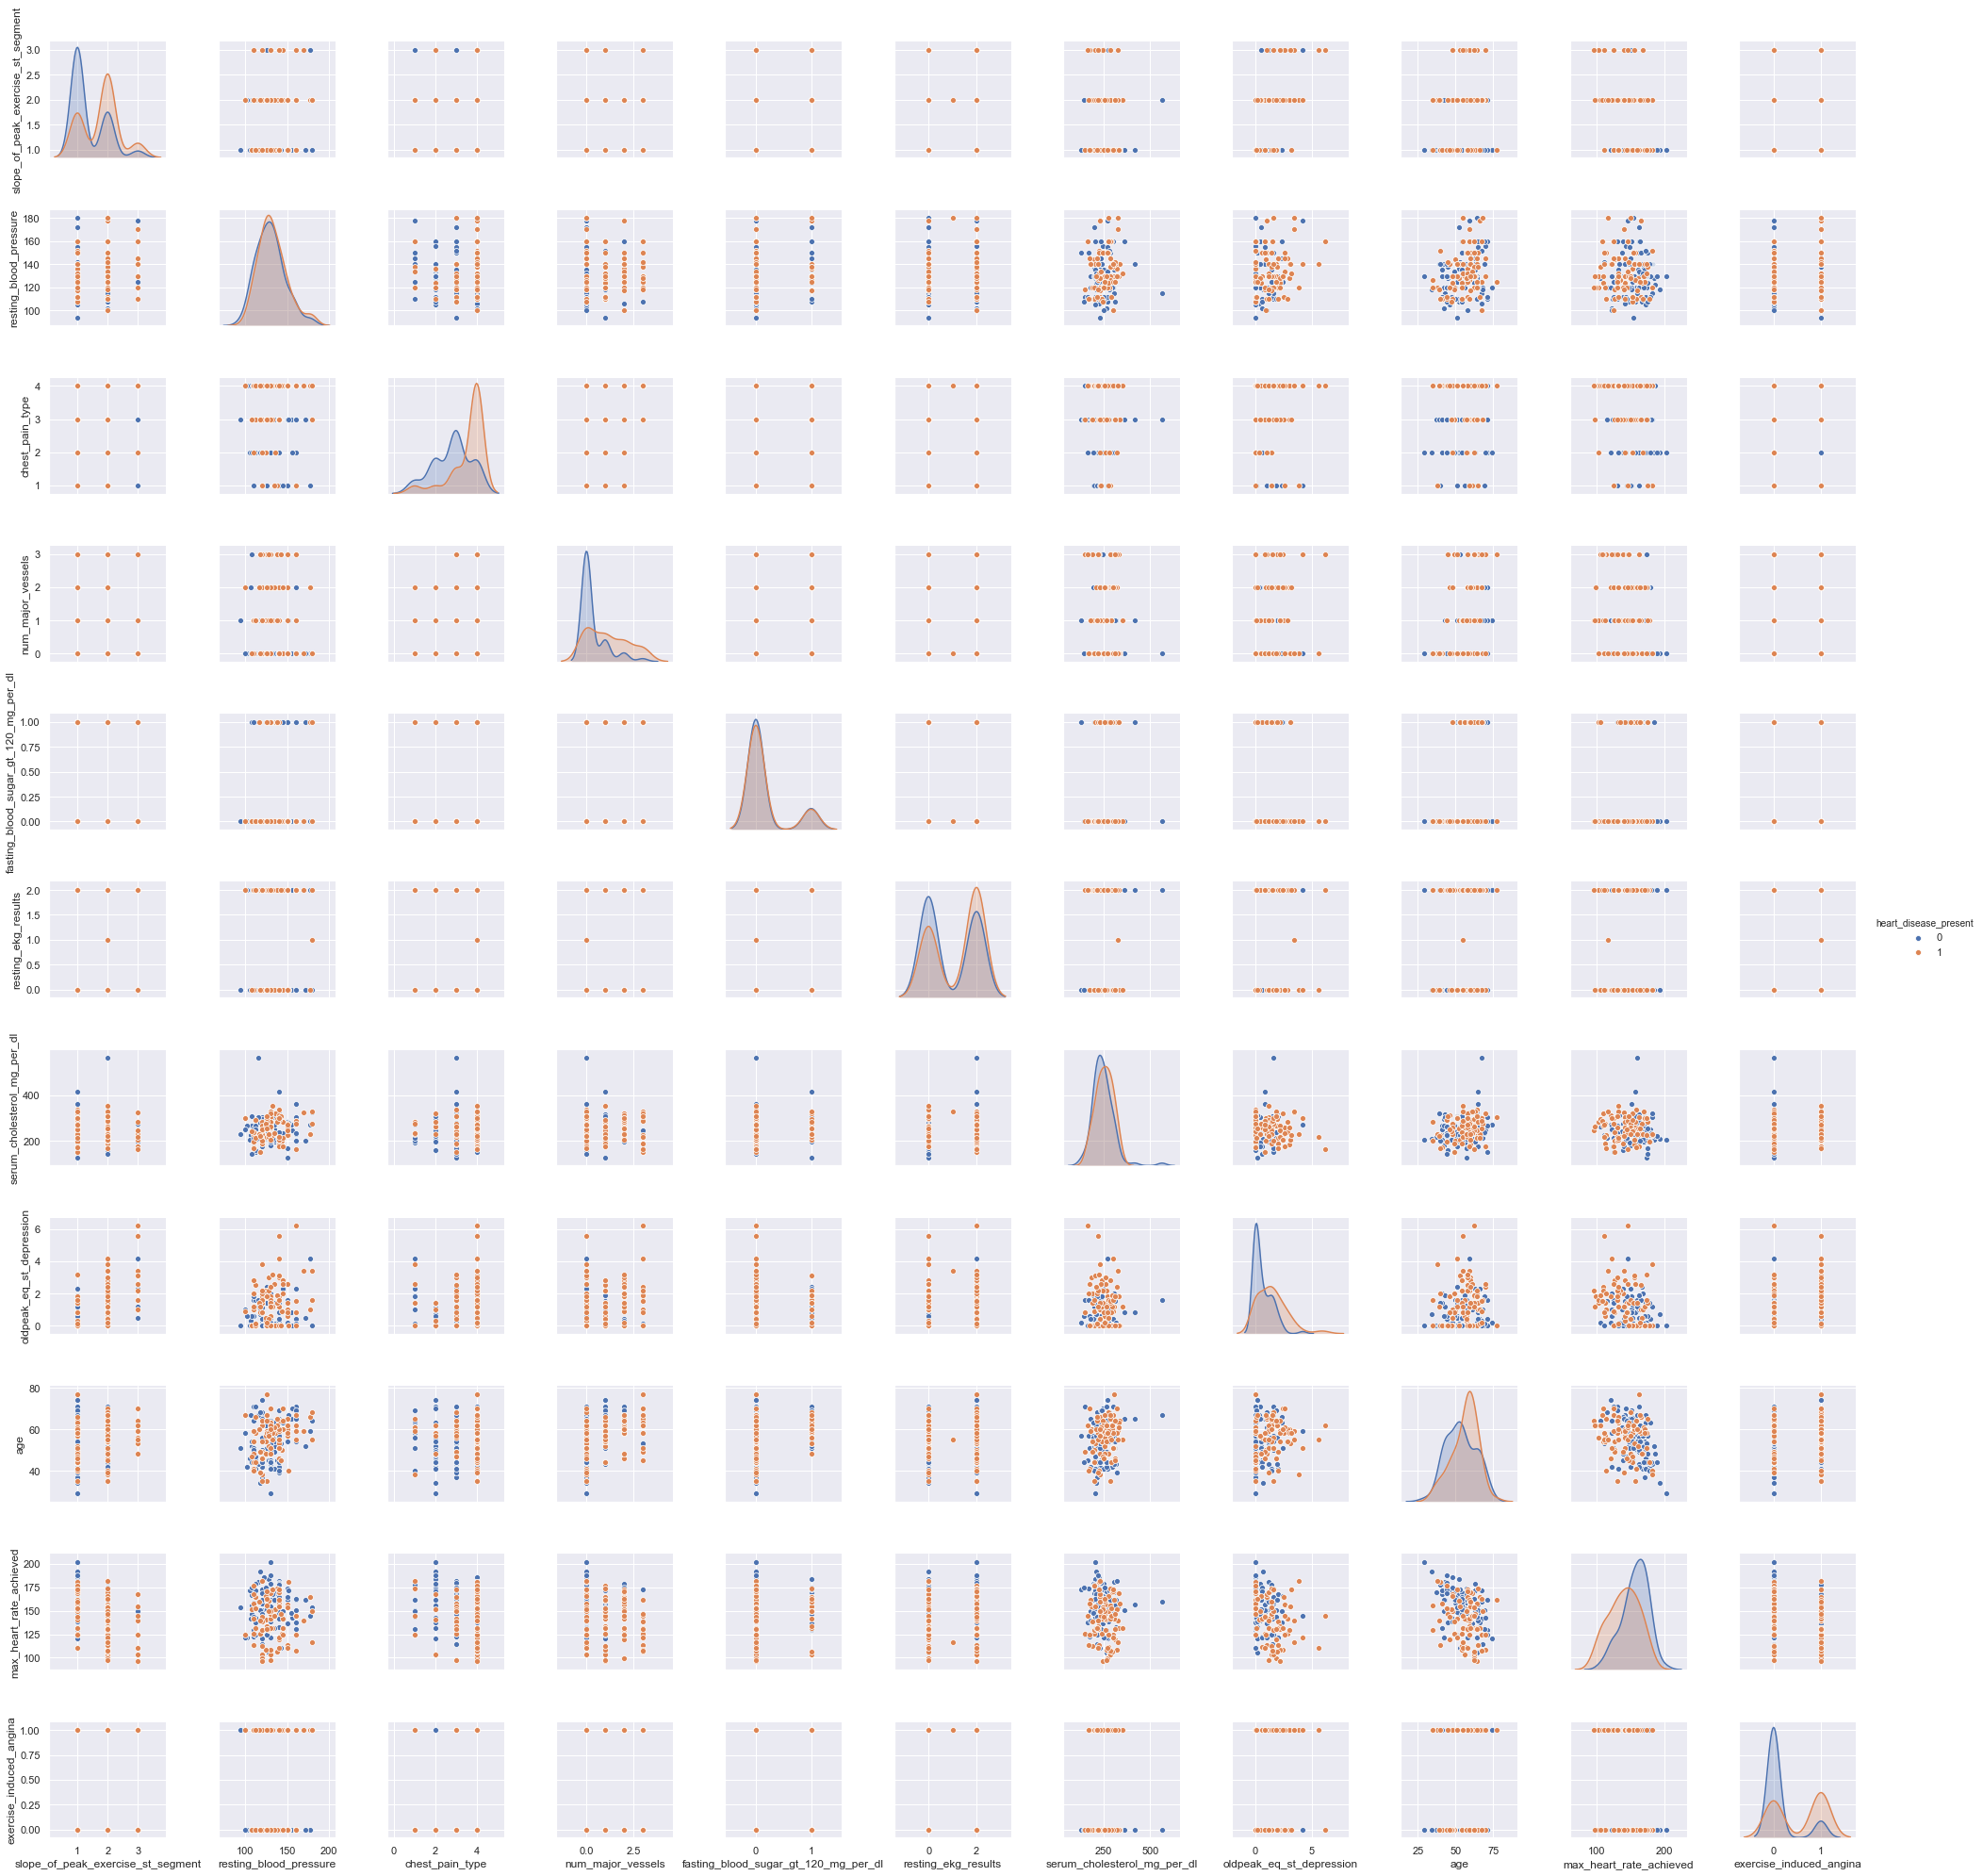

In [24]:
sns.pairplot(data, hue = 'heart_disease_present')

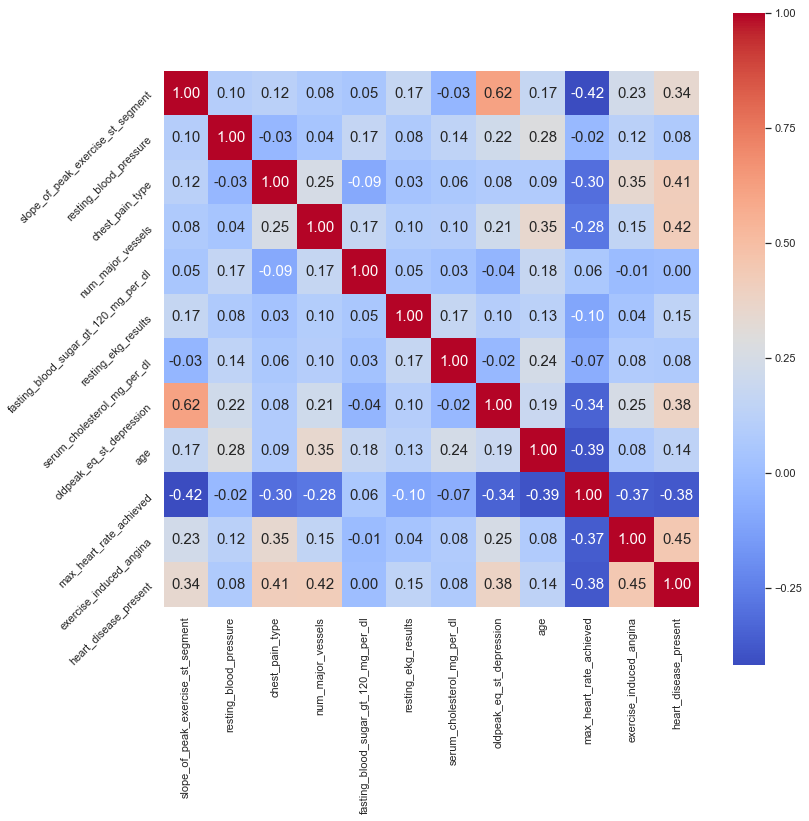

In [19]:
corr = data.drop(columns = ['thal','sex']).corr()  #is used for find corelation
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['thal','sex']).columns, 
           yticklabels= data.drop(columns = ['thal','sex']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

**Transformación de datos**

Transformamos la columna `sex`

In [25]:
diccionario = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(diccionario)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


Y la columna `thal`

In [26]:
data = pd.concat([data, pd.get_dummies(data['thal'])], axis=1)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


Volvemos a hacer el gráfico de correlación.

Primero, para mantener cierto orden, mandamos la columna `heart_disease_present` al final.

In [30]:
columns = list(data.columns.values)
# print(columns)
columns.remove('heart_disease_present')
# print(columns)
columns = columns + ['heart_disease_present']
print(columns)

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina', 'fixed_defect', 'normal', 'reversible_defect', 'heart_disease_present']


In [28]:
data = data[columns]
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1,0


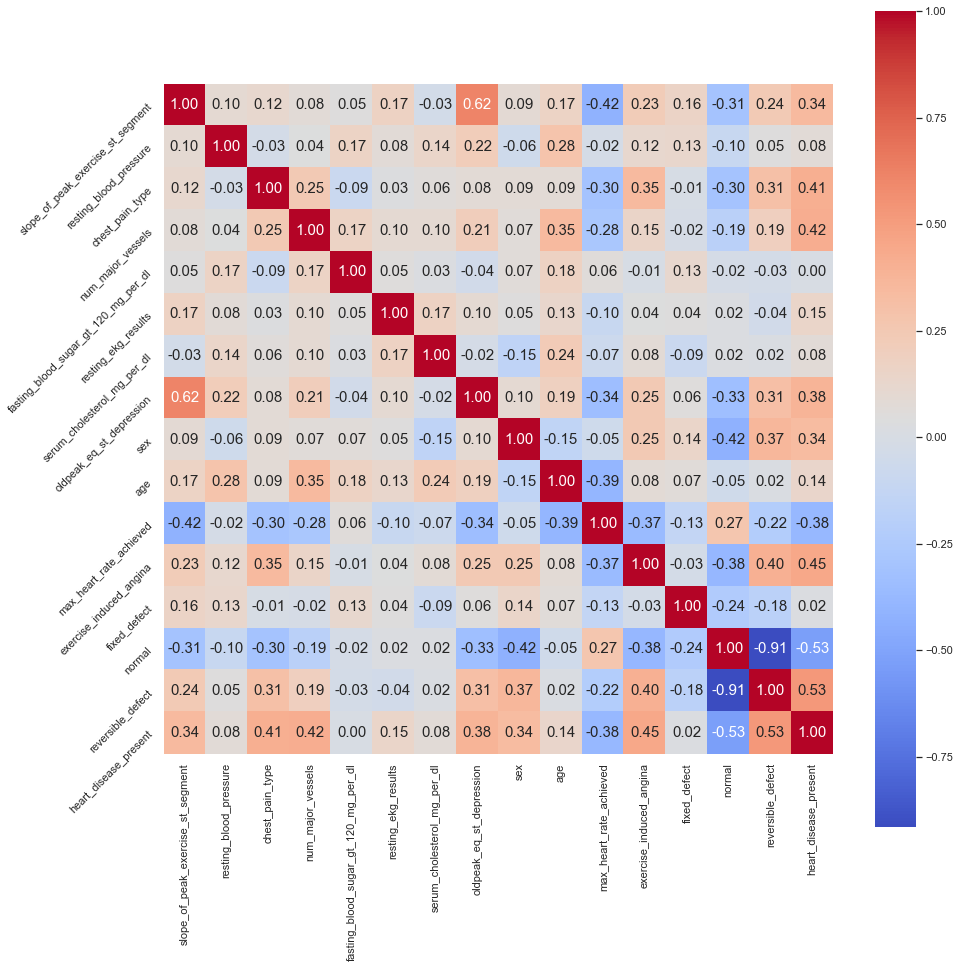

In [29]:
corr = data.drop(columns = ['thal']).corr()  #is used for find corelation
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['thal']).columns, 
           yticklabels= data.drop(columns = ['thal']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()